In [113]:
import numpy as np
from scipy.integrate import solve_ivp
import scipy.fft
import matplotlib.pyplot as plt

In [114]:
def rossler(t, Y, omega, a, b, c):
    x, y, z = Y
    dx_dt = -omega * y - z
    dy_dt = omega * x + a * y
    dz_dt = b + z * (x - c)
    return [dx_dt, dy_dt, dz_dt]

In [115]:
a = 0.16
b = 0.1
c = 8.5
omega = 1

In [116]:
sol = solve_ivp(rossler, [2000, 2300], [5, 5, 0], args=(omega, a, b, c), dense_output=True)

In [117]:
t = np.linspace(2000, 2300, 10000)
res = sol.sol(t)    # dense_output=True

In [118]:
signal = res[1]
fourier = scipy.fft.rfft(signal)
# 计算采样频率
sampling_freq = len(t) / (t[-1] - t[0])
frequencies = np.fft.rfftfreq(len(res[1]), 1/sampling_freq)
# 计算功率谱
power_spectrum = np.abs(fourier) ** 2

Text(0.5, 1.0, 'Power Spectrum of Rössler Oscillator (a=0.16, b=0.1, c=8.5)')

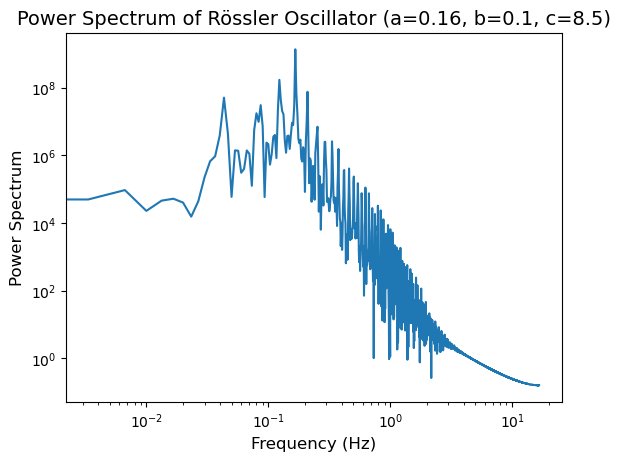

In [121]:
# 绘制功率谱图（对数-对数坐标）
# plt.figure(figsize=(10, 6))
plt.loglog(frequencies, power_spectrum)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Power Spectrum', fontsize=12)
plt.title('Power Spectrum of Rössler Oscillator (a=0.16, b=0.1, c=8.5)', fontsize=14)
# plt.grid(True, which='both', linestyle='--', alpha=0.7)